# Preliminary Steps

In [1]:
# Imports
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Loading data
folder = "Users/oliver/Desktop/18/chicago-Data/Chicago/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])

In [2]:
# setting datetime format 
format='%m/%d/%Y %H:%M:%S %p'
# creating datetime column
df['Datetime']=pd.to_datetime(df['Date'],format=format)
df=df.sort_values('Datetime')
# Setting datetime as index
df=df.set_index('Datetime')
# dropping unnecessary columns
df=df.drop(columns=['Date','ID', 'Latitude', 'Longitude', 'Arrest',
                    'Domestic', 'Location Description', 'Description'])
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7818535 entries, 2001-01-01 01:00:00 to 2023-06-07 12:55:00
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Primary Type  object 
 1   Beat          int64  
 2   District      float64
 3   Ward          float64
dtypes: float64(2), int64(1), object(1)
memory usage: 298.3+ MB


None

,Primary Type,Beat,District,Ward
Datetime,,,,
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,913,9.0,14.0
2001-01-01 01:00:00,BATTERY,731,7.0,NaN
2001-01-01 01:00:00,CRIMINAL DAMAGE,2424,24.0,NaN
2001-01-01 01:00:00,NARCOTICS,1033,10.0,NaN
2001-01-01 01:00:00,CRIMINAL DAMAGE,1913,19.0,NaN


# Analysis

#### 1. Comparing Police Districts:
#### Which district has the most crimes? Which has the least?


Text(0.5, 1.0, 'Crimes per District')

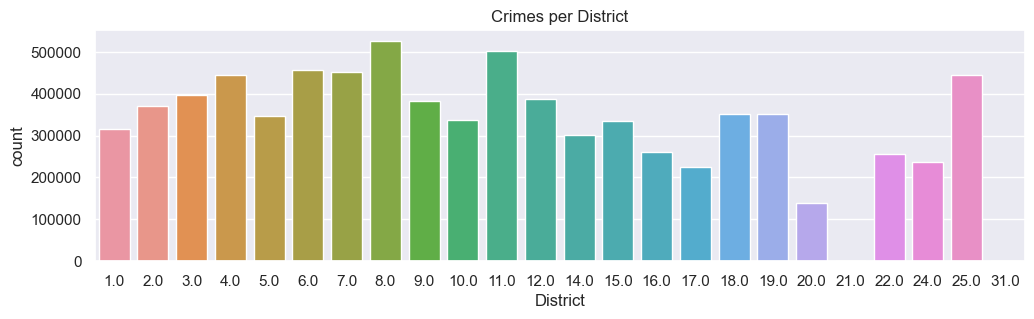

In [3]:
# Plotting crime counts by district
sns.set(rc={"figure.figsize":[12, 3]})
sns.countplot(data=df,x='District').set_title('Crimes per District')

District 8 had the most crimes, while district 20 had the least. 

#### 2. Crimes Across the Years:
#### Is the total number of crimes increasing or decreasing across the years?
#### Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

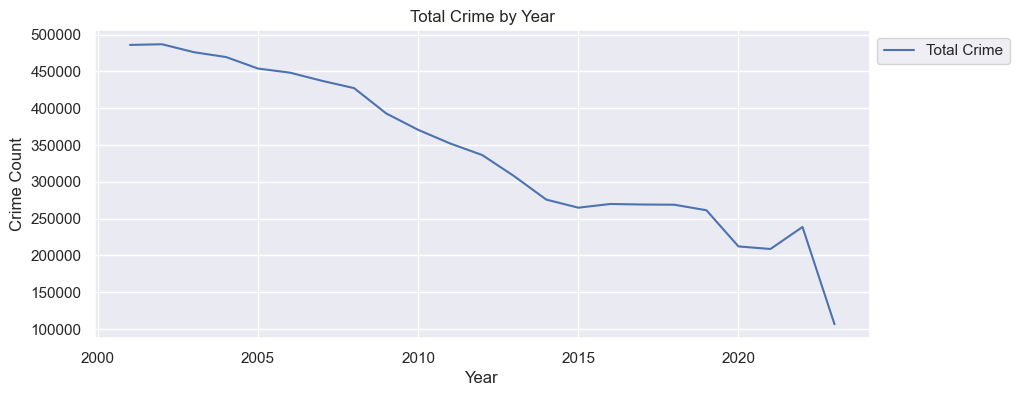

In [4]:
## Plotting total crime
# making crime by year groupby
by_year = df.groupby([df.index.year,'Primary Type'])['Primary Type'].size().unstack()
# getting sum of all crime 
total_crime = by_year.sum(axis=1)
plt.figure(figsize=[10,4])
plt.plot(total_crime, label='Total Crime')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Total Crime by Year')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

We see a steady decrease in crime up until about around 2022 where crime spikes slightly. Overall, crime is decreased.

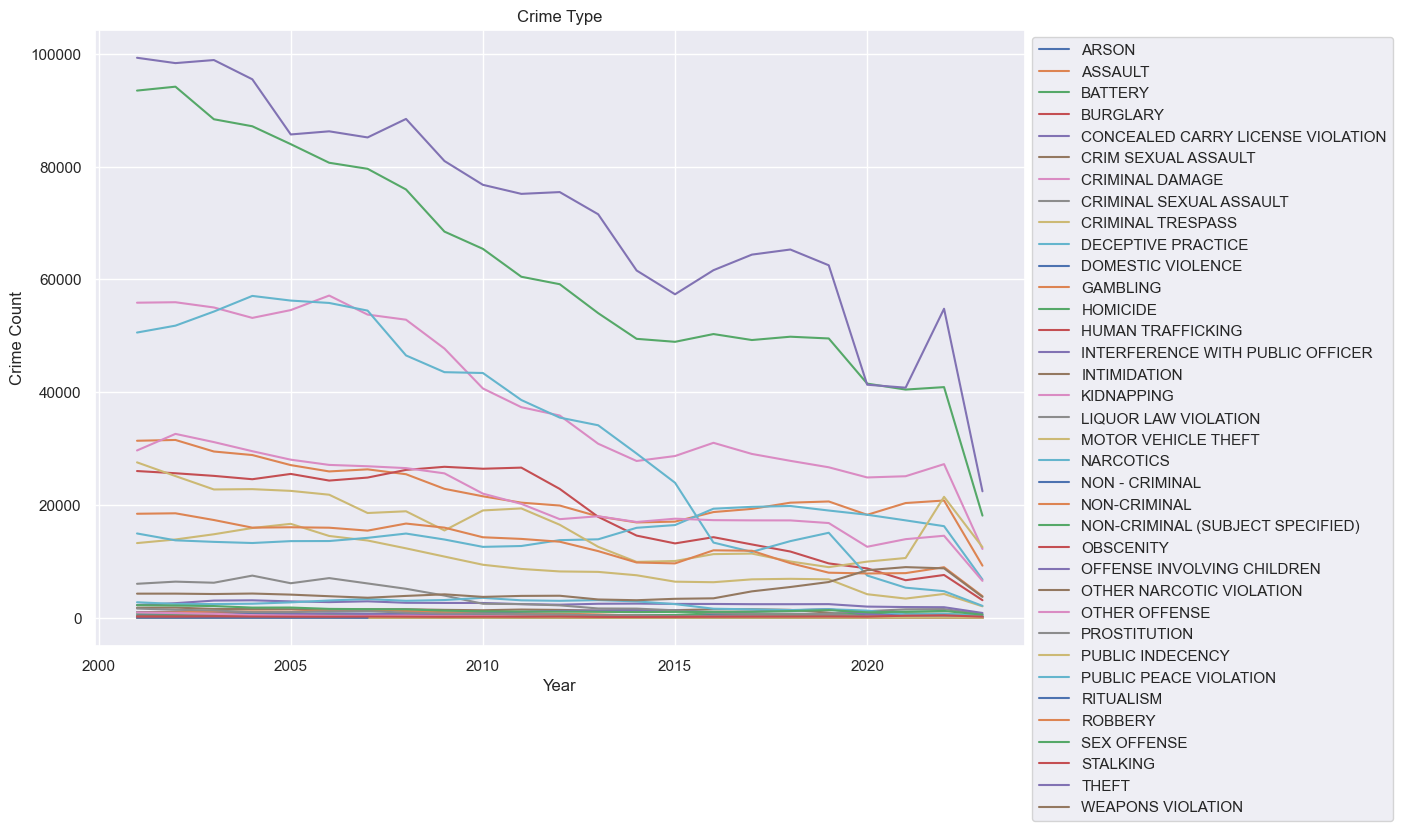

In [5]:
## Plotting individual crimes
# setting figsize
plt.figure(figsize=[12, 8])
# looping through groupby features and plotting by year
for col in by_year.columns:
    plt.plot(by_year[col], label=col)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Crime Type');

We can see that individual crimes: 'theft' and 'motor vehicle theft' went in the opposite direction for a time towards the end of our plot.

#### 3. Comparing Months:
#### What months have the most crime? What months have the least?
#### Are there any individual crimes that do not follow this pattern? If so, which crimes?

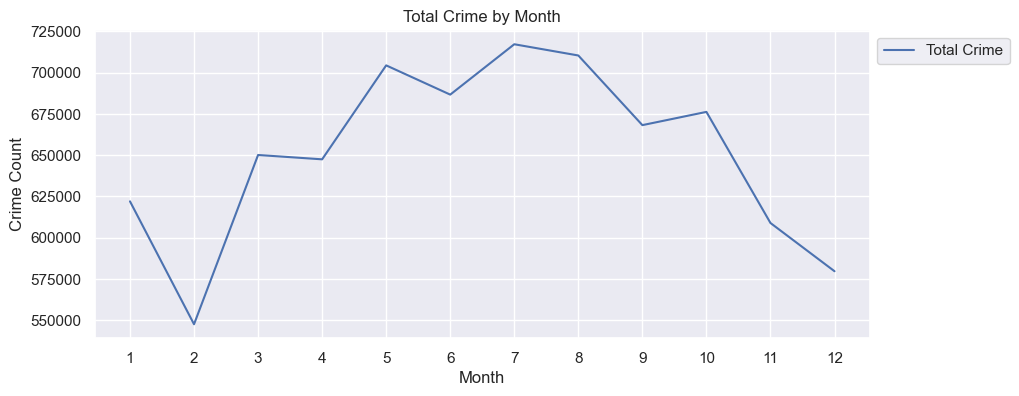

In [6]:
# slighlty altering previous code to plot monthly
by_month = df.groupby([df.index.month,'Primary Type'])['Primary Type'].size().unstack()
# getting sum of all crime 
total_crime_month = by_month.sum(axis=1)
plt.figure(figsize=[10,4])
plt.plot(total_crime_month, label='Total Crime')
plt.xlabel('Month')
plt.xticks(range(1,13))
plt.ylabel('Crime Count')
plt.title('Total Crime by Month')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

Our plot shows us that May, July, and August have the highest counts of crime among all months. It also shows January, February, and December having the least crime.

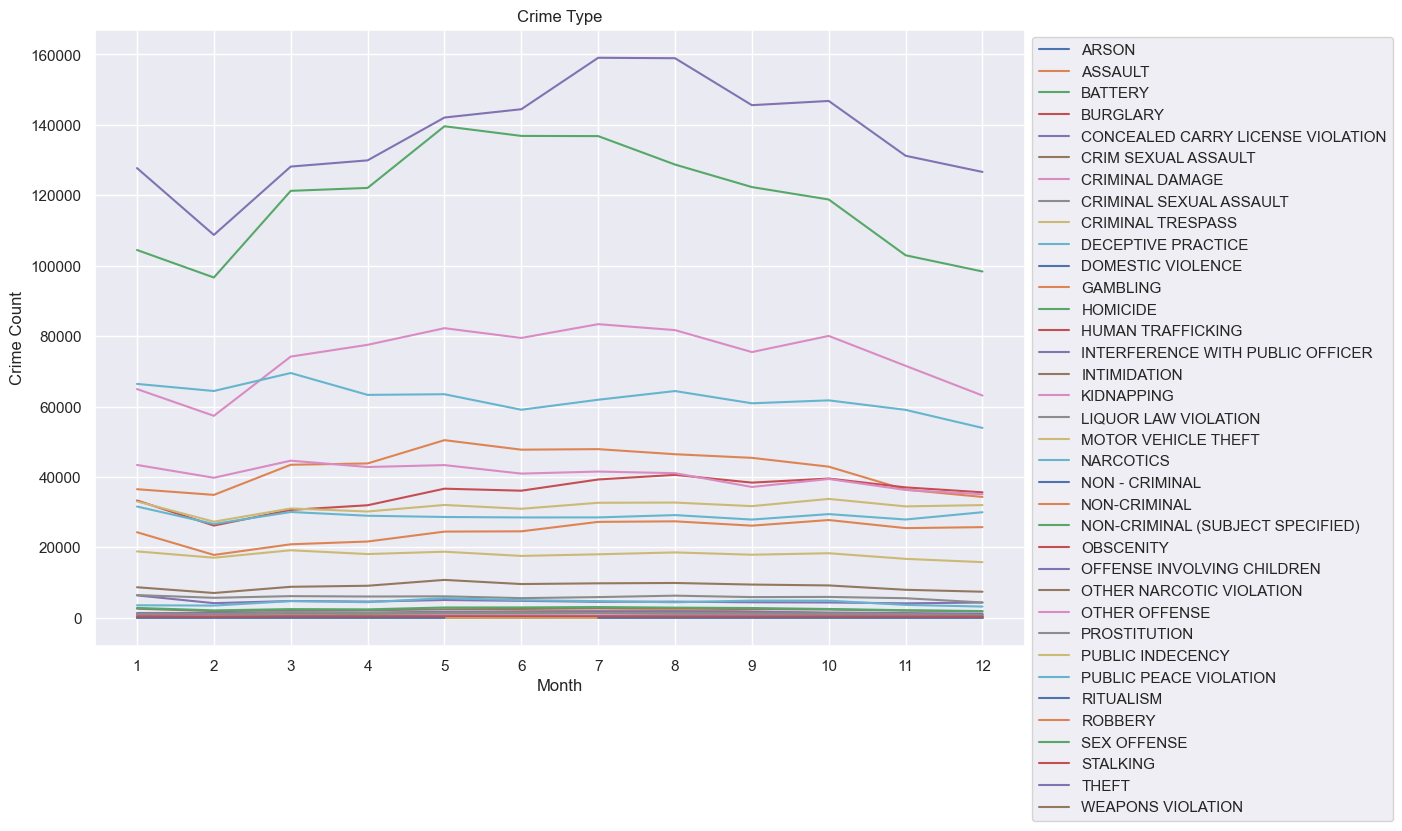

In [7]:
## Plotting individual crimes 
# setting figsize
plt.figure(figsize=[12, 8])
# looping through groupby features and plotting by year
for col in by_month.columns:
    plt.plot(by_month[col], label=col)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Month')
plt.xticks(range(1,13))
plt.ylabel('Crime Count')
plt.title('Crime Type');

Some crimes such as, deceptive practice, public indecency, ritualism, stalking, and other rarer crimes do not follow this pattern, likely due to them not being very common crimes in the first place. They don't have much of a trend at all. Their trendline is rather flat.